In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools as it
import matplotlib.gridspec as gridspec
from datetime import datetime

%matplotlib inline

/Users/ericmjl/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
experiment_start = datetime(2015, 12, 22, 15, 33, 0)
experiment_end = datetime(2015, 12, 22, 16, 59, 59)

In [4]:
data_columns = ['tracker_id', 'dB', 'year', 'month', 'day', 'hour', 'minute', 'second']

def as_datetime(x):
    return datetime(x.year, x.month, x.day, x.hour, x.minute, x.second)

def read_data(handle):
    df = pd.read_csv(handle, header=None)
    df.columns = data_columns
    df['date'] = df.apply(lambda x:as_datetime(x), axis=1)
    df = df[(df['date'] > experiment_start) & (df['date'] < experiment_end)]
    return df

def get_id(head, tail):
    """
    Head: the first two letters of the tracker ID.
    Tail: the last two letters of the tracker ID.
    
    Both must be strings.
    """
    
    for t in list(tracker_ids):
        header = t.split(':')[0]
        tailer = t.split(':')[-1]
        
        if header == head and tailer == tail:
            return t
            break

bt1 = read_data('bt1.csv')
bt2 = read_data('bt2.csv')
bt3 = read_data('bt3.csv')
bt4 = read_data('bt4.csv')

print(len(bt1), len(bt2), len(bt3), len(bt4))

831 2156 2712 2581


In [5]:
# bt4[bt4['tracker_id'] == get_id('F4', '37')]

In [6]:
# Collate a list/set of all tracker IDs
tracker_ids = set().union(bt1.tracker_id).union(bt2.tracker_id).union(bt3.tracker_id).union(bt4.tracker_id)
tracker_ids

{'68:9E:19:11:8E:FD',
 '68:9E:19:11:A3:03',
 '68:9E:19:11:A6:DB',
 'F4:B8:5E:C4:56:22',
 'F4:B8:5E:C4:5F:8C',
 'F4:B8:5E:C4:68:37',
 'F4:B8:5E:C4:8F:EE',
 'F4:B8:5E:DC:B5:DD',
 'F4:B8:5E:DD:42:D2',
 'F4:B8:5E:DD:47:06',
 'F4:B8:5E:DD:47:1B'}

In [7]:
# Set distances for each of the relevant trackers, relative to each base station.
bt1_distances = dict()

bt1_distances[get_id('F4', '1B')] = 0
bt1_distances[get_id('68', 'DB')] = 12
bt1_distances[get_id('68', 'FD')] = 24
bt1_distances[get_id('F4', 'D2')] = 36
bt1_distances[get_id('F4', '06')] = 48

bt1_distances[get_id('F4', 'EE')] = 12
bt1_distances[get_id('68', '03')] = 24
bt1_distances[get_id('F4', 'DD')] = 36
bt1_distances[get_id('F4', '8C')] = 48

In [8]:
bt2_distances = dict()
bt2_distances[get_id('F4', '06')] = 0
bt2_distances[get_id('F4', 'D2')] = 12
bt2_distances[get_id('68', 'FD')] = 24
bt2_distances[get_id('68', 'DB')] = 36
bt2_distances[get_id('F4', '1B')] = 48

In [9]:
bt3_distances = dict()
bt3_distances[get_id('F4', '8C')] = 0
bt3_distances[get_id('F4', 'DD')] = 12
bt3_distances[get_id('68', '03')] = 24
bt3_distances[get_id('F4', 'EE')] = 36
bt3_distances[get_id('F4', '1B')] = 48

In [10]:
bt4_distances = dict()
bt4_distances[get_id('F4', '1B')] = 48
bt4_distances[get_id('68', 'DB')] = 60
bt4_distances[get_id('68', 'FD')] = 72
bt4_distances[get_id('F4', 'D2')] = 84
bt4_distances[get_id('F4', '06')] = 96

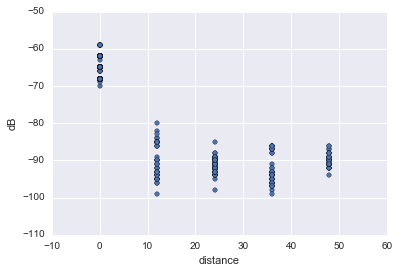

In [11]:
bt1['distance'] = bt1['tracker_id'].apply(lambda x:bt1_distances[x] if x in bt1_distances.keys() else None)
bt1.dropna().plot(x='distance', y='dB', kind='scatter')
# sns.violinplot(x=bt1.dropna()['distance'], y=bt1.dropna()['dB'])

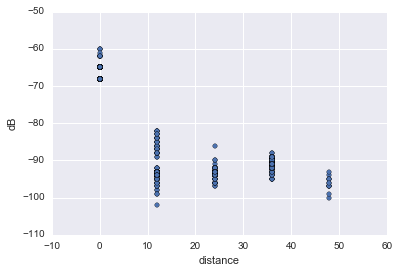

In [12]:
bt2['distance'] = bt2['tracker_id'].apply(lambda x:bt2_distances[x] if x in bt2_distances.keys() else None)
bt2.dropna().plot(x='distance', y='dB', kind='scatter')
# sns.violinplot(x=bt2.dropna()['distance'], y=bt2.dropna()['dB'])

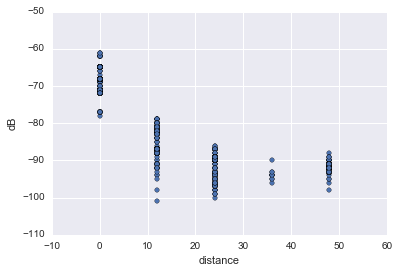

In [13]:
bt3['distance'] = bt3['tracker_id'].apply(lambda x:bt3_distances[x] if x in bt3_distances.keys() else None)
bt3.dropna().plot(x='distance', y='dB', kind='scatter')
# sns.violinplot(x=bt3.dropna()['distance'], y=bt3.dropna()['dB'])

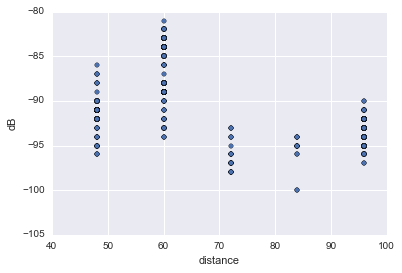

In [14]:
bt4['distance'] = bt4['tracker_id'].apply(lambda x:bt4_distances[x] if x in bt4_distances.keys() else None)
bt4.dropna().plot(x='distance', y='dB', kind='scatter')
# sns.violinplot(x=bt4.dropna()['distance'], y=bt4.dropna()['dB'])

In [15]:
bt1.head()

,tracker_id,dB,year,month,day,hour,minute,second,date,distance
615,68:9E:19:11:8E:FD,-91,2015,12,22,15,33,2,2015-12-22 15:33:02,24
616,F4:B8:5E:C4:68:37,-95,2015,12,22,15,33,2,2015-12-22 15:33:02,NaN
617,F4:B8:5E:DC:B5:DD,-91,2015,12,22,15,33,2,2015-12-22 15:33:02,36
618,F4:B8:5E:DD:47:1B,-65,2015,12,22,15,33,2,2015-12-22 15:33:02,0
619,68:9E:19:11:A3:03,-93,2015,12,22,15,33,2,2015-12-22 15:33:02,24


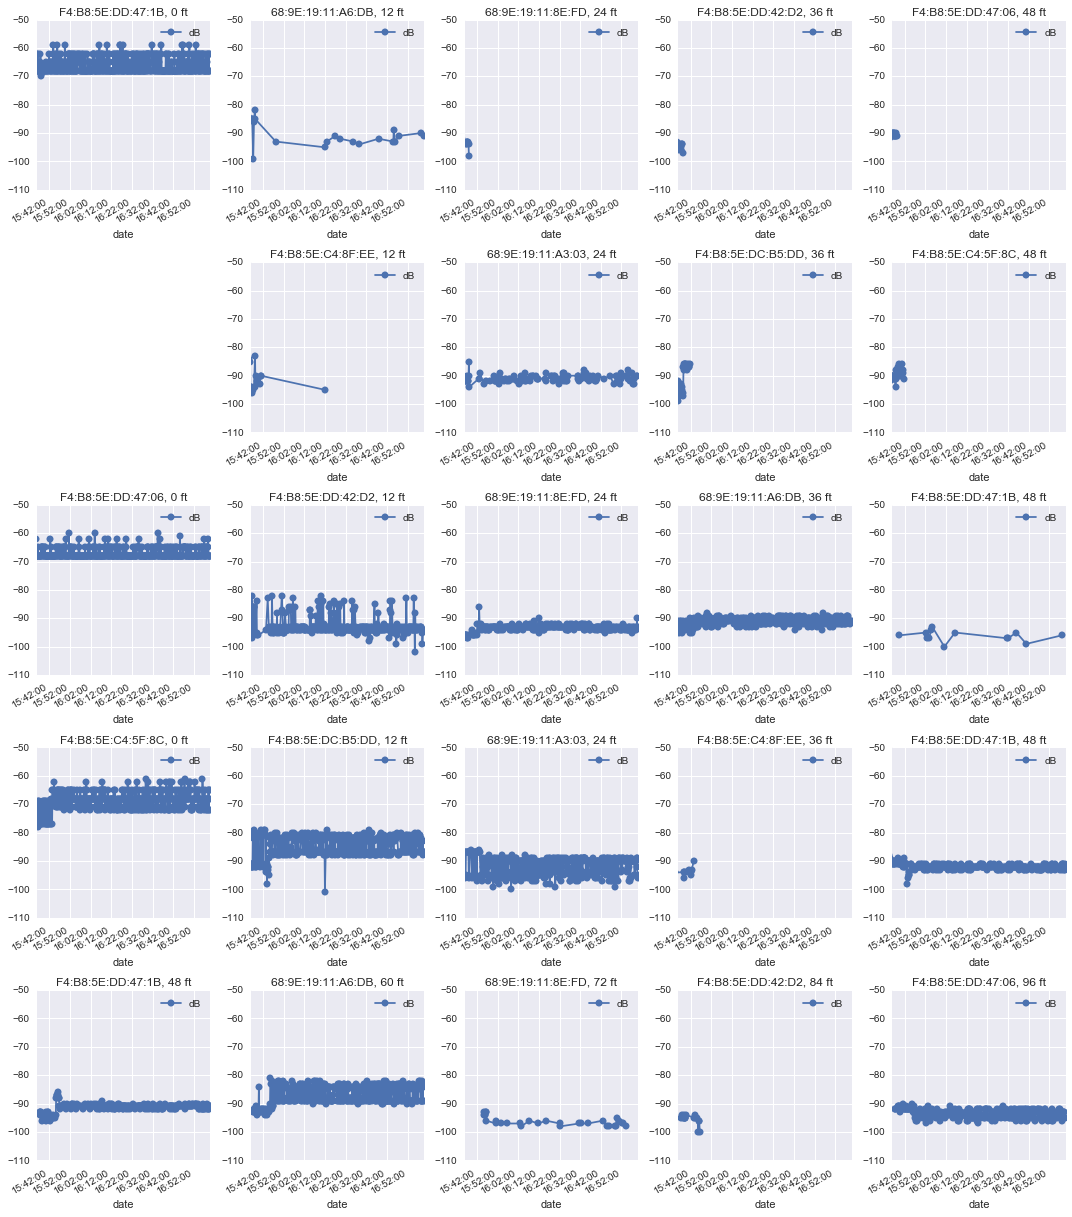

In [18]:
distances_short = [12, 24, 36, 48]
distances_long = [48, 60, 72, 84, 96]

fig = plt.figure(figsize=(15, 17))
gs = gridspec.GridSpec(5,5)

# Plots for BT1 - two rows for short distances.
ax = fig.add_subplot(gs[0,0])
bt1[(bt1['distance'] == 0) & (bt1['tracker_id'] == get_id('F4', '1B'))].plot(x='date', y='dB', ax=ax, marker='o')
ax.set_ylim(-110, -50)
ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
ax.set_title('{0}, {1} ft'.format(get_id('F4', '1B'), 0))

bt1_axis1 = [get_id('68', 'DB'), get_id('68', 'FD'), 
             get_id('F4', 'D2'), get_id('F4', '06')]
for i, d in enumerate(distances_short):
    ax = fig.add_subplot(gs[0, i+1])
    bt1[(bt1['distance'] == d) & (bt1['tracker_id'] == bt1_axis1[i])].plot(x='date', y='dB', ax=ax, marker='o')
    ax.set_ylim(-110, -50)
    ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
    ax.set_title('{0}, {1} ft'.format(bt1_axis1[i], d))
    
bt1_axis2 = [get_id('F4', 'EE'), get_id('68', '03'), 
             get_id('F4', 'DD'), get_id('F4', '8C')]
for i, d in enumerate(distances_short):
    ax = fig.add_subplot(gs[1, i+1])
    bt1[(bt1['distance'] == d) & (bt1['tracker_id'] == bt1_axis2[i])].plot(x='date', y='dB', ax=ax, marker='o')
    ax.set_ylim(-110, -50)
    ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
    ax.set_title('{0}, {1} ft'.format(bt1_axis2[i], d))
    
# Plots for BT2
bt2_trackers = [get_id('F4', '06'), get_id('F4', 'D2'), get_id('68', 'FD'), 
                get_id('68', 'DB'), get_id('F4', '1B')]
for i, d in enumerate([0] + distances_short):
    ax = fig.add_subplot(gs[2, i])
    bt2[(bt2['distance'] == d) & (bt2['tracker_id'] == bt2_trackers[i])].plot(x='date', y='dB', ax=ax, marker='o')
    ax.set_ylim(-110, -50)
    ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
    ax.set_title('{0}, {1} ft'.format(bt2_trackers[i], d))

# Plots for BT3
bt3_trackers = [get_id('F4', '8C'), get_id('F4', 'DD'), get_id('68', '03'), 
                get_id('F4', 'EE'), get_id('F4', '1B')]
for i, d in enumerate([0] + distances_short):
    ax = fig.add_subplot(gs[3, i])
    bt3[(bt3['distance'] == d) & (bt3['tracker_id'] == bt3_trackers[i])].plot(x='date', y='dB', ax=ax, marker='o')
    ax.set_ylim(-110, -50)
    ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
    ax.set_title('{0}, {1} ft'.format(bt3_trackers[i], d))

# # Plots for BT4
bt4_trackers = [get_id('F4', '1B'), get_id('68', 'DB'), get_id('68', 'FD'), 
                get_id('F4', 'D2'), get_id('F4', '06')]
for i, d in enumerate(distances_long):
    ax = fig.add_subplot(gs[4, i])
    bt4[(bt4['distance'] == d) & (bt4['tracker_id'] == bt4_trackers[i])].plot(x='date', y='dB', ax=ax, marker='o')
    ax.set_ylim(-110, -50)
    ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
    ax.set_title('{0}, {1} ft'.format(bt4_trackers[i], d))


# for i, d in enumerate(ids_axis2):
#     ax = fig.add_subplot(gs[3, i])
#     bt4[bt4['tracker_id'] == d].plot(x='date', y='dB', ax=ax)
#     ax.set_ylim(-110, -50)
#     ax.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
#     ax.set_title('BT4, {0}'.format(d))

plt.tight_layout()
plt.savefig('distance-vs-time.pdf')

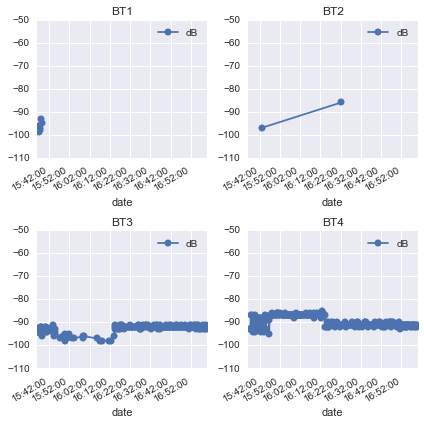

In [19]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

bt1_moving = bt1[bt1.tracker_id == get_id('F4', '37')]
bt1[bt1.tracker_id == get_id('F4', '37')].plot(x='date', y='dB', ax=ax1, marker='o')
ax1.set_ylim(-110, -50)
ax1.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
ax1.set_title('BT1')

bt2_moving = bt2[bt2.tracker_id == get_id('F4', '37')]
bt2[bt2.tracker_id == get_id('F4', '37')].plot(x='date', y='dB', ax=ax2, marker='o')
ax2.set_ylim(-110, -50)
ax2.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
ax2.set_title('BT2')

bt3_moving = bt3[bt3.tracker_id == get_id('F4', '37')]
bt3[bt3.tracker_id == get_id('F4', '37')].plot(x='date', y='dB', ax=ax3, marker='o')
ax3.set_ylim(-110, -50)
ax3.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
ax3.set_title('BT3')

bt4_moving = bt4[bt4.tracker_id == get_id('F4', '37')]
bt4[bt4.tracker_id == get_id('F4', '37')].plot(x='date', y='dB', ax=ax4, marker='o')
ax4.set_ylim(-110, -50)
ax4.set_xlim(datetime(2015,12,22,15,36,0), datetime(2015,12,22,16,59,59))
ax4.set_title('BT4')

plt.tight_layout()

## Preliminary Conclusions

- I think it's clear that distinguishing between 0 and 12 ft is as good as we can hope.
- Additionally, based on the traces for devices such as `F4:B8:5E:DD:47:06`, where we can detect some signal @ 96 ft but not at 48 ft, I suspect there may be some interference between trackers going on - is this plausible?
- Or is it because I have the scanning time (10s) too low? What if I let the scanner scan for 30 seconds instead of 10? Will it pick up all of the devices more reliably? Will we get fewer 